In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dm = pd.read_csv('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Output/Submission/DM/data/653.csv')
sel_fts = pd.read_csv('../Output/Submission/features/Features_Selected.csv')
sel_fts = sel_fts['Feature'].values

dm.reset_index()
dm.rename(columns={'Unnamed: 0':'Feature'}, inplace=True)
# dm = dm[dm['Feature'].isin(sel_fts)]

dm = dm.set_index('Feature')
# dm = dm[sel_fts]

print(dm.shape)

dm_vals = dm.values
dm



(72, 72)


,firstorder_10Percentile,firstorder_90Percentile,firstorder_Entropy,firstorder_InterquartileRange,firstorder_Kurtosis,firstorder_MeanAbsoluteDeviation,firstorder_Mean,firstorder_Median,firstorder_Range,firstorder_RobustMeanAbsoluteDeviation,...,gldm_LargeDependenceEmphasis,gldm_LargeDependenceHighGrayLevelEmphasis,gldm_LargeDependenceLowGrayLevelEmphasis,gldm_LowGrayLevelEmphasis,gldm_SmallDependenceEmphasis,gldm_SmallDependenceHighGrayLevelEmphasis,gldm_SmallDependenceLowGrayLevelEmphasis,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength
Feature,,,,,,,,,,,,,,,,,,,,,
firstorder_10Percentile,0.000000,0.331754,0.389854,0.445573,0.273435,0.393235,0.174972,0.144893,0.255563,0.449200,...,1.350326,0.103966,0.970234,0.943841,0.360306,0.374335,0.494472,0.338535,0.405245,0.434742
firstorder_90Percentile,0.331754,0.000000,0.268737,0.143517,0.495492,0.096124,0.160376,0.201535,0.374051,0.141705,...,1.551884,0.271157,1.022806,1.008512,0.124624,0.171113,0.602581,0.177087,0.179149,0.294090
firstorder_Entropy,0.389854,0.268737,0.000000,0.345674,0.563854,0.250514,0.273645,0.327689,0.268971,0.355063,...,1.353516,0.321357,0.842545,0.821953,0.325764,0.427920,0.459804,0.415679,0.310600,0.543214
firstorder_InterquartileRange,0.445573,0.143517,0.345674,0.000000,0.552626,0.097970,0.287706,0.319621,0.463061,0.021243,...,1.620853,0.381185,1.029571,1.021551,0.140162,0.167649,0.644665,0.181083,0.125507,0.259090
firstorder_Kurtosis,0.273435,0.495492,0.563854,0.552626,0.000000,0.523728,0.383228,0.357514,0.364385,0.560250,...,1.303423,0.301125,0.896067,0.880893,0.470982,0.468553,0.467469,0.417891,0.480706,0.466024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gldm_SmallDependenceHighGrayLevelEmphasis,0.374335,0.171113,0.427920,0.167649,0.468553,0.207286,0.250904,0.261325,0.467007,0.159786,...,1.645518,0.338242,1.099966,1.089707,0.134257,0.000000,0.678188,0.058666,0.223237,0.133801
gldm_SmallDependenceLowGrayLevelEmphasis,0.494472,0.602581,0.459804,0.644665,0.467469,0.577027,0.528536,0.547923,0.288020,0.662059,...,1.004647,0.472948,0.496893,0.457106,0.590738,0.678188,0.000000,0.630924,0.548573,0.736182
ngtdm_Complexity,0.338535,0.177087,0.415679,0.181083,0.417891,0.208908,0.228944,0.235290,0.429230,0.179745,...,1.599545,0.303724,1.058075,1.046372,0.132831,0.058666,0.630924,0.000000,0.205623,0.135997


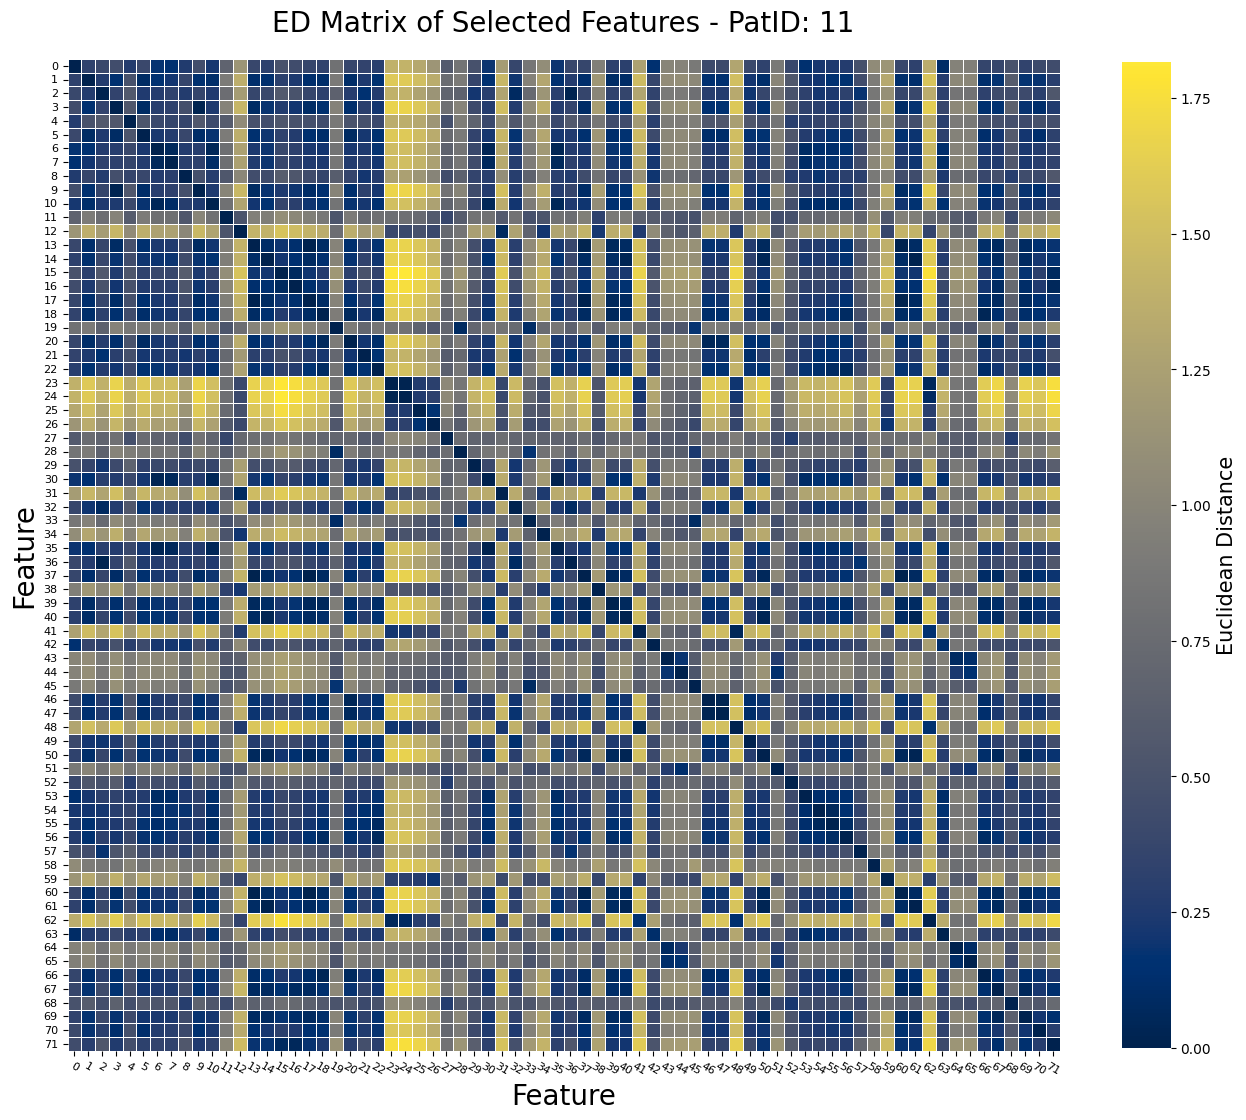

In [24]:
# plot the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(dm_vals, cmap='cividis', square=True, annot=False, cbar=True, cbar_kws={'shrink': 0.8, 'label': 'Euclidean Distance'}, edgecolor='black', linewidth=0.5)
# change fontsize of colorbar title
plt.gcf().axes[-1].yaxis.label.set_size(15)

plt.title('ED Matrix of Selected Features - PatID: 11', fontsize=20, pad=20)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Feature', fontsize=20)

# xticks should be 1, len(dm.columns), 1, 
xticks_new = np.arange(0.5, len(dm.columns), 1)
yticks_new = np.arange(0.5, len(dm.columns), 1)

xticks_labels = np.arange(0, len(dm.columns), 1)
yticks_labels = np.arange(0, len(dm.columns), 1)

plt.xticks(ticks=xticks_new, labels=xticks_labels, rotation=-30, fontsize=8)
plt.yticks(ticks=yticks_new, labels=yticks_labels, rotation=0, fontsize=8)
#plt.xticks(ticks=np.arange(0.5, len(dm.columns), 1), labels=dm.columns, rotation=90, fontsize=6)
#plt.yticks(ticks=np.arange(0.5, len(dm.columns), 1), labels=dm.columns, rotation=0, fontsize=6)

plt.savefig('./ED_All_Features.png', dpi=300)